<a href="https://colab.research.google.com/github/Vyasbabbadi/Movie-Genere-Classification/blob/main/Movie_Genere_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pwd

/content


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

In [ ]:
df_test = pd.read_csv('/content/test_data.txt', sep=":::", header = 0 , engine = 'python')
df_train = pd.read_csv('/content/train_data.txt', sep=":::", header = 0 , engine = 'python')
df_train.columns = ['SN', 'movie_name', 'category', 'confession']
df_test.columns = ['SN', 'movie_name' , 'confession']

In [ ]:
df_test.head()

,SN,movie_name,confession
0,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
1,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
2,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
3,5,Er nu zhai (1955),Before he was known internationally as a mart...
4,6,Riddle Room (2016),Emily Burns is being held captive in a room w...


In [ ]:
df_train.head()

,SN,movie_name,category,confession
0,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
1,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
2,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
3,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
4,6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39281 entries, 0 to 39280
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   SN          39281 non-null  int64 
 1   movie_name  39281 non-null  object
 2   confession  39281 non-null  object
dtypes: int64(1), object(2)
memory usage: 920.8+ KB


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40134 entries, 0 to 40133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   SN          40134 non-null  int64 
 1   movie_name  40134 non-null  object
 2   category    40134 non-null  object
 3   confession  40134 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB


In [ ]:
df_train.describe()

,SN
count,40134.000000
mean,20068.500000
std,11585.832188
min,2.000000
25%,10035.250000
50%,20068.500000
75%,30101.750000
max,40135.000000


In [ ]:
df_test.describe()

,SN
count,39281.000000
mean,19642.000000
std,11339.592299
min,2.000000
25%,9822.000000
50%,19642.000000
75%,29462.000000
max,39282.000000


In [ ]:
df_test.isnull().sum()

SN            0
movie_name    0
confession    0
dtype: int64

In [ ]:
df_train.isnull().sum()

SN            0
movie_name    0
category      0
confession    0
dtype: int64

In [ ]:
df_train.count()

SN            40134
movie_name    40134
category      40134
confession    40134
dtype: int64

In [ ]:
df_test.count()

SN            39281
movie_name    39281
confession    39281
dtype: int64

In [ ]:
df_train.iloc[0:3]

,SN,movie_name,category,confession
0,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
1,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
2,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...


In [ ]:
df_train.loc[0]

SN                                                            2
movie_name                                        Cupid (1997) 
category                                              thriller 
confession     A brother and sister with a past incestuous r...
Name: 0, dtype: object

In [ ]:
df_test.shape

(39281, 3)

In [ ]:
df_train.shape

(40134, 4)

 **Visualization of Data**

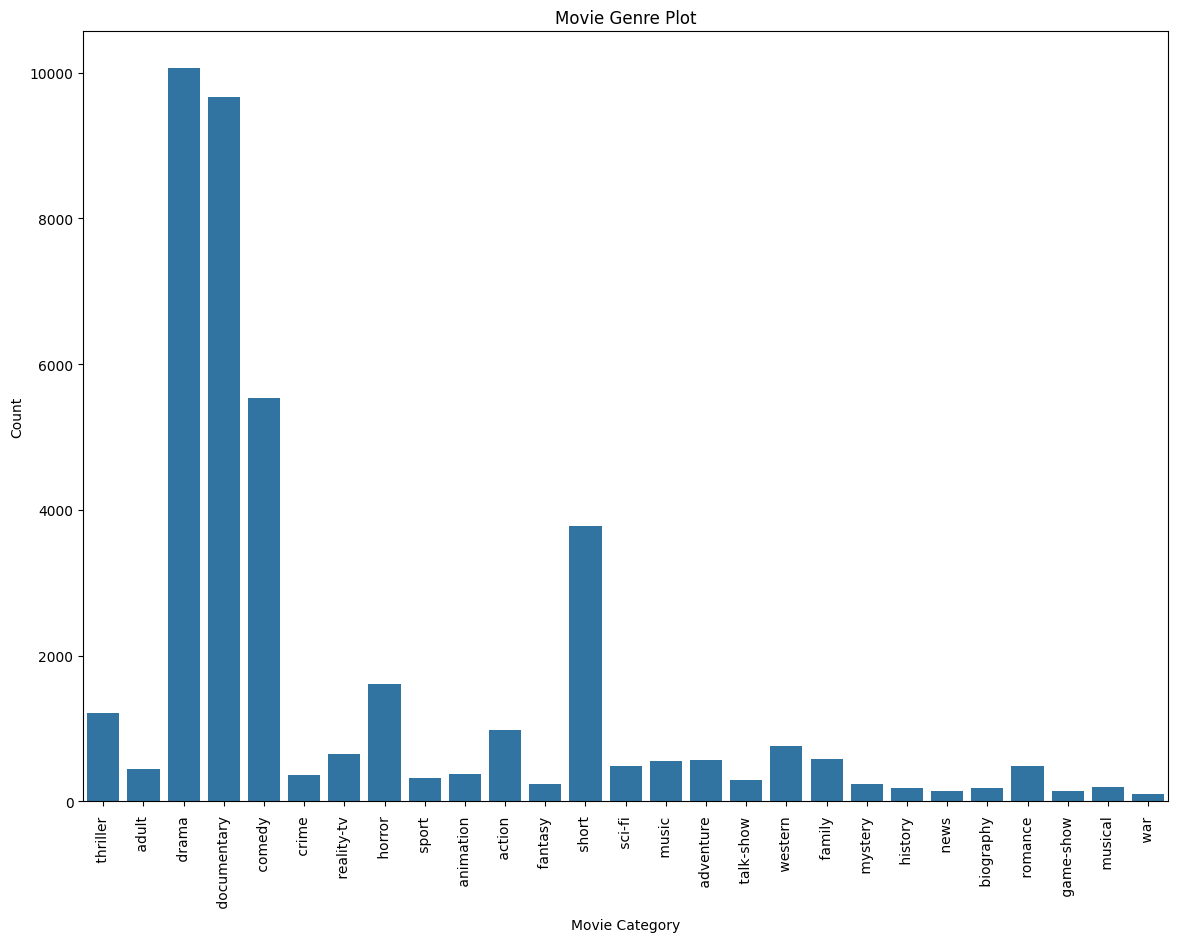

In [ ]:
plt.figure(figsize=(14,10))
sns.countplot(x='category', data=df_train)
plt.xlabel('Movie Category')
plt.ylabel('Count')
plt.title('Movie Genre Plot')
plt.xticks(rotation=90);
plt.show()

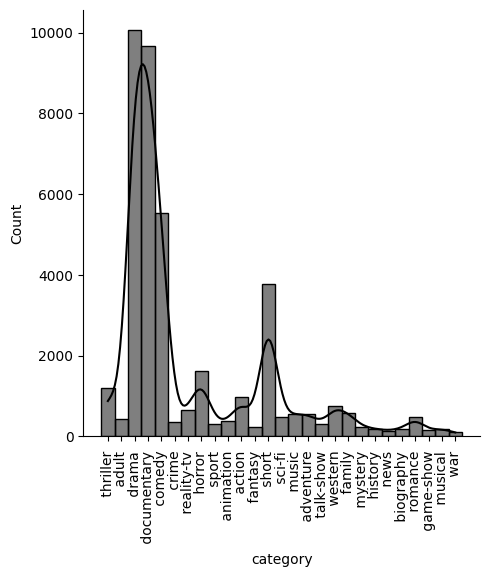

In [ ]:
sns.displot(df_train.category, kde =True, color = "black")
plt.xticks(rotation=90);

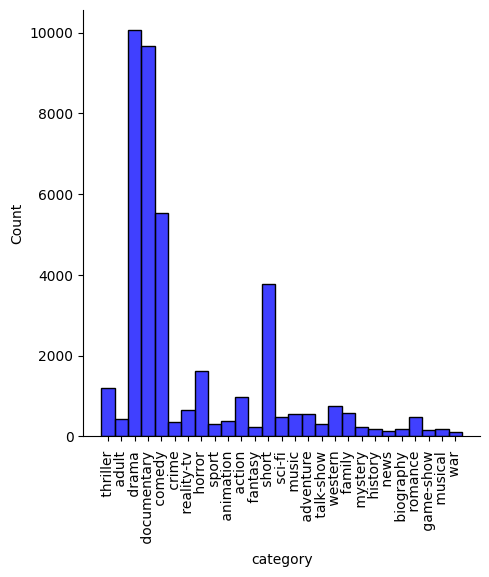

In [ ]:
sns.displot(df_train.category, kde=False, color = "blue")
plt.xticks(rotation=90);

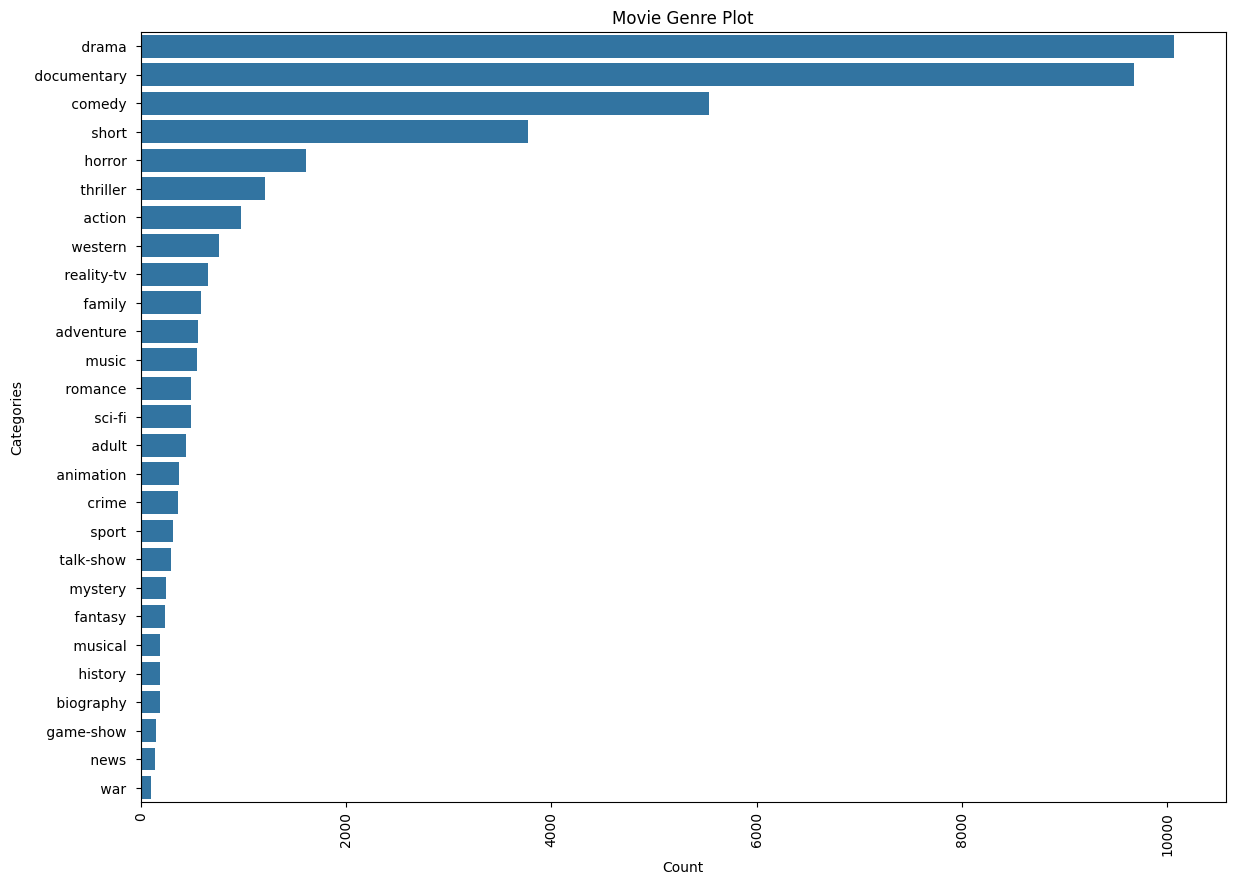

In [ ]:
plt.figure(figsize = (14,10))
count1 = df_train.category.value_counts()
sns.barplot(x = count1, y = count1.index, orient = 'h')
plt.xlabel('Count')
plt.ylabel('Categories')
plt.title('Movie Genre Plot')
plt.xticks(rotation=90)
plt.show()

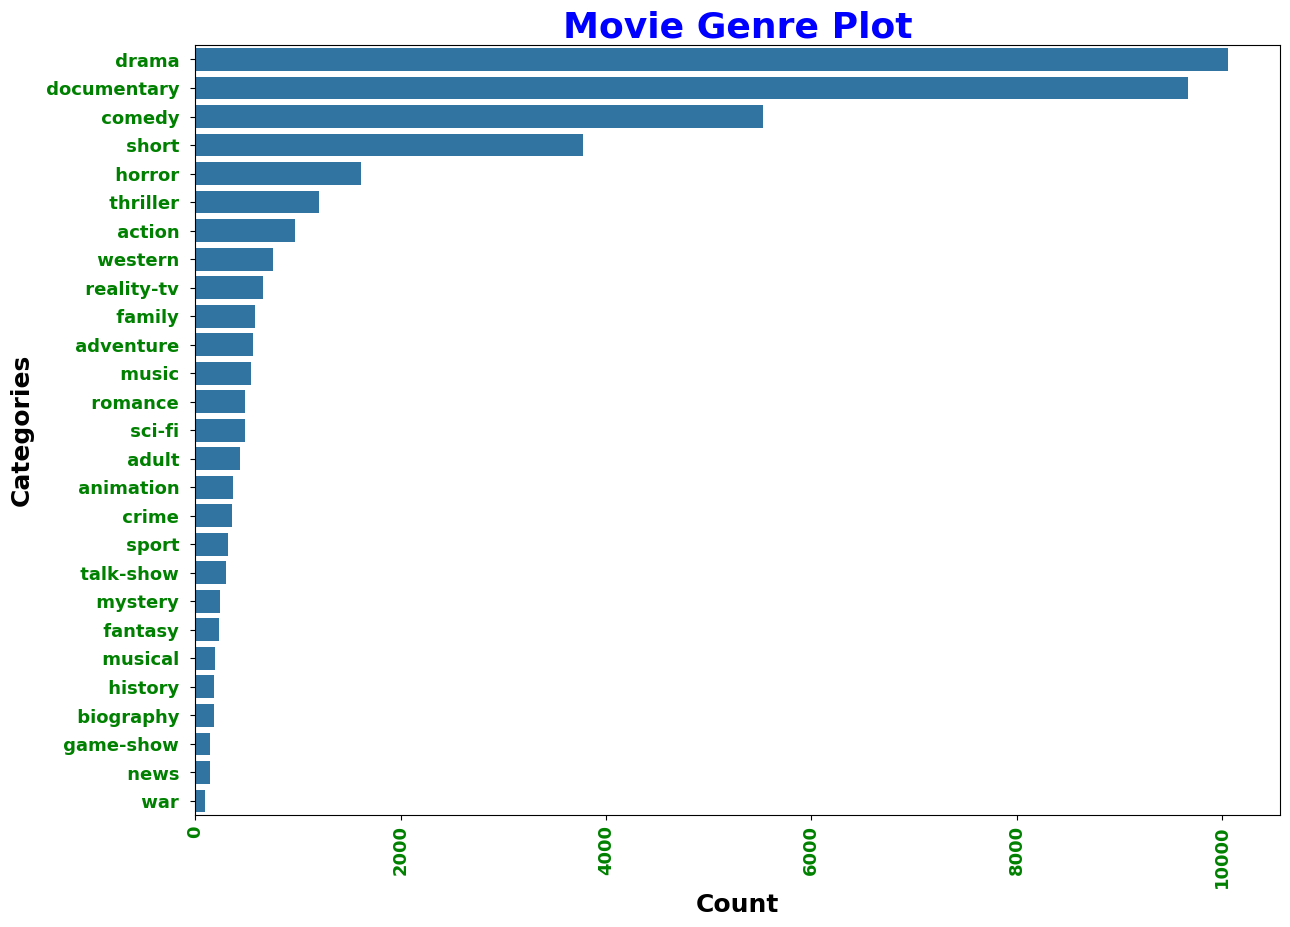

In [ ]:
plt.figure(figsize = (14,10))
count1 = df_train.category.value_counts()
sns.barplot(x = count1, y = count1.index, orient = 'h')
plt.xlabel('Count', fontsize = 18, fontweight = 'bold')
plt.ylabel('Categories', fontsize = 18, fontweight = 'bold')
plt.title('Movie Genre Plot', fontsize = 26, fontweight = 'bold', color = 'blue')
plt.xticks(rotation=90, fontsize = 13, fontweight = 'bold', color = 'green')
plt.yticks(fontsize = 13, fontweight = 'bold', color = 'green')
plt.show()

In [ ]:
df_combined = pd.concat([df_train, df_test], axis = 0)

In [ ]:
df_combined.head()

,SN,movie_name,category,confession
0,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
1,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
2,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
3,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
4,6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...


In [ ]:
df_combined.shape

(79415, 4)

In [ ]:
df_combined.size

317660

In [ ]:
df_combined.isnull().any()

SN            False
movie_name    False
category       True
confession    False
dtype: bool

In [ ]:
df_combined.count()

SN            79415
movie_name    79415
category      40134
confession    79415
dtype: int64

In [ ]:
encoder = LabelEncoder()
df_combined["category"] = encoder.fit_transform(df_combined["category"].values)

In [ ]:
encoder = LabelEncoder()
df_combined["movie_name"] = encoder.fit_transform(df_combined["movie_name"].values)

In [ ]:
df_combined.head()

,SN,movie_name,category,confession
0,2,22802,24,A brother and sister with a past incestuous r...
1,3,78768,1,As the bus empties the students for their fie...
2,4,70443,8,To help their unemployed father make ends mee...
3,5,71495,8,The film's title refers not only to the un-re...
4,6,54535,7,Quality Control consists of a series of 16mm ...


In [ ]:
df_combined.category = df_combined.category.fillna(df_combined.category.mean())

In [ ]:
df_combined.count()

SN            79415
movie_name    79415
category      79415
confession    79415
dtype: int64

In [ ]:
df_combined.duplicated().values.any()

False

**Preprocess the Data**

In [ ]:
vectorizer = TfidfVectorizer()

In [ ]:
X = vectorizer.fit_transform(df_combined["confession"])

In [ ]:
df_combined.head()

,SN,movie_name,category,confession
0,2,22802,24,A brother and sister with a past incestuous r...
1,3,78768,1,As the bus empties the students for their fie...
2,4,70443,8,To help their unemployed father make ends mee...
3,5,71495,8,The film's title refers not only to the un-re...
4,6,54535,7,Quality Control consists of a series of 16mm ...


In [ ]:
y = df_combined["category"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Train Naive Bayes Classifier**

In [ ]:
naive_bayes_model = MultinomialNB()

In [ ]:
naive_bayes_model.fit(X_train, y_train)

MultinomialNB()

In [ ]:
nb_predictions = naive_bayes_model.predict(X_test)

In [ ]:
print("Naive Bayes Model:")
print(confusion_matrix(y_test, nb_predictions))
print(classification_report(y_test, nb_predictions))
print("Accuracy: ", accuracy_score(y_test, nb_predictions))
print("r2_Score: ", r2_score(y_test, nb_predictions))

Naive Bayes Model:
[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0  184]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0   86]
 [   0    0    0    0    0    2    0    0    1    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0  107]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0   61]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0   32]
 [   0    0    0    0    0   11    0    0    3    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0 1033]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Train Logic Regression Model**

In [ ]:
logistic_regression_model = LogisticRegression()

In [ ]:
logistic_regression_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
lr_predictions = logistic_regression_model.predict(X_test)

In [ ]:
print("Logistic Regression Model:")
print(confusion_matrix(y_test, lr_predictions))
print(classification_report(y_test, lr_predictions))
print("Accuracy: ", accuracy_score(y_test, lr_predictions))
print("r2_Score: ", r2_score(y_test, lr_predictions))

Logistic Regression Model:
[[   0    0    0    0    0    1    0    0    1    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0  182]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0   86]
 [   0    0    0    0    0    1    0    0    1    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0  108]
 [   0    0    0    0    0    1    0    1    2    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0   57]
 [   0    0    0    0    0    0    0    2    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0   30]
 [   0    0    0    0    0   72    0    2   10    0    0    0    0    0
     0    0    0    0    0    0    1    0    0    0    0    0    0  962]
 [   0    0    0    0    0    0    0    1    1    0    0    0    0    0
     0    0    0    0    0    0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
